In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random
import openpyxl


In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [91]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.325431,2.042563,0.685320,0.094224,-1.009913,0
1,1.799581,1.817799,1.388431,1.151516,-0.838124,0
2,-2.418949,-1.962691,-3.115263,-1.949971,0.245242,1
3,1.497009,-1.376104,-1.452637,1.290145,1.152186,0
4,-0.081651,0.260658,-0.648827,0.890082,1.798587,0


In [71]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [92]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns[df.columns !="target"].tolist() ,int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [73]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [93]:
df1 = sample_features(df, 0.8)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_5912\3074485473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [94]:
df1

,col1,col4,col2,col5,target
0,1.325431,0.094224,2.042563,-1.009913,0
1,1.799581,1.151516,1.817799,-0.838124,0
2,-2.418949,-1.949971,-1.962691,0.245242,1
3,1.497009,1.290145,-1.376104,1.152186,0
4,-0.081651,0.890082,0.260658,1.798587,0
...,...,...,...,...,...
95,-1.447416,0.467856,-0.404552,1.802249,1
96,1.156536,1.823748,-0.416114,2.310501,0
97,-4.020169,0.420913,-0.767358,0.086251,1
98,0.267935,0.862794,-1.353195,1.464980,0


In [52]:
df2 = sample_rows(df, 0.2)

In [53]:
df3 = sample_rows(df,0.2)

In [54]:
# df2 = combined_sampling(df,0.5,0.5)

In [55]:
# df2 = combined_sampling(df,0.5,0.5)

In [56]:
# df3 = combined_sampling(df,0.5,0.5)

In [57]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [58]:
df3

,col1,col2,col3,col4,col5,target
69,3.593774,1.507009,-1.282788,0.517884,0.924409,1
21,-0.461300,1.318943,1.748066,0.657264,-0.207236,0
37,1.672321,1.136329,-1.427732,1.628508,-0.810299,1
82,-0.603561,0.508178,1.297610,1.907992,0.288577,0
22,-0.308372,2.079895,-1.130505,4.757518,-1.133852,1
7,1.827976,1.575901,1.105450,0.385525,-1.436386,0
1,3.938734,2.119187,-1.836723,2.132544,1.402572,1
24,1.094984,0.902537,0.965562,2.120553,-1.553758,0
50,-0.082254,0.626951,-0.938343,1.234069,-0.597458,1
81,0.716989,1.778139,-0.289278,1.562680,-0.786612,1


In [59]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [60]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [61]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[2] <= -0.039\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.625, 0.5, '  False')]

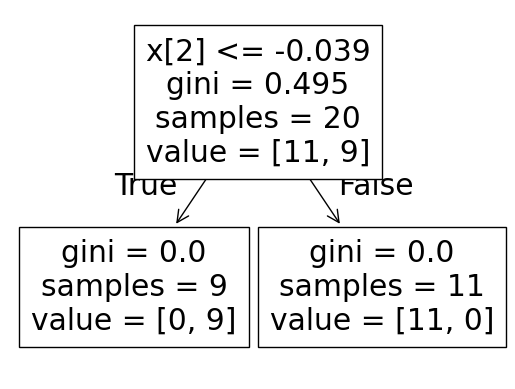

In [62]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.038\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= -0.462\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

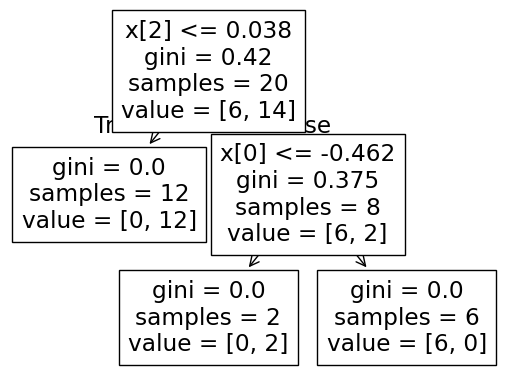

In [63]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= 0.114\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.625, 0.5, '  False')]

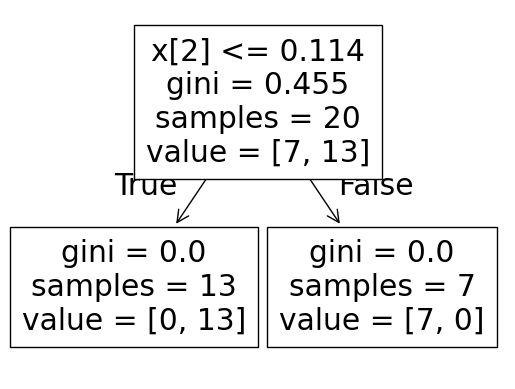

In [64]:
plot_tree(clf3)

In [65]:
clf1.predict(np.array([3.991398,-2.262176,-2.212392,-1.325457,-1.613397]).reshape(1,5))

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [66]:
clf2.predict(np.array([3.991398,-2.262176,-2.212392,-1.325457,-1.613397]).reshape(1,5))

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [67]:
clf3.predict(np.array([3.991398,-2.262176,-2.212392,-1.325457,-1.613397]).reshape(1,5))

c:\Users\zeesh\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
